## MACHINE LEARNING DAY-13 : Naive Bayes

### What is Naive Bayes
**Naive Bayes** is a **supervised machine learning algorithm** based on **Bayes' Theorem** and is primarily used for **classification** tasks. It’s called "naive" because it makes a **strong assumption of independence** between the features — which is rarely true in real-world data, but the algorithm still works surprisingly well in practice.

---

### 1. **Bayes' Theorem Recap**

Bayes’ Theorem gives the probability of a class `C` given some observed features `X`:

$$
P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}
$$

Where:

* $P(C|X)$: Posterior — probability of class given the features
* $P(X|C)$: Likelihood — probability of features given the class
* $P(C)$: Prior — probability of the class
* $P(X)$: Evidence — overall probability of the features

---

### 2. **How Naive Bayes Works**

To classify a new example, Naive Bayes:

1. Computes the **prior** probability for each class (based on training data)
2. Calculates the **likelihood** of the observed features for each class
3. Multiplies the priors and likelihoods together to compute **posterior probabilities**
4. Chooses the class with the **highest posterior**

Because it assumes **feature independence**, the joint likelihood becomes:

$$
P(X|C) = P(x_1|C) \cdot P(x_2|C) \cdot \ldots \cdot P(x_n|C)
$$

This simplification makes the algorithm fast and efficient.

---

### 3. **Types of Naive Bayes Classifiers**

Depending on the type of data and how likelihoods are calculated, we have:

#### a) **Gaussian Naive Bayes**

* Assumes features are continuous and normally distributed.
* Uses the probability density function of a normal distribution.
* Example: Medical diagnosis, sensor readings.

#### b) **Multinomial Naive Bayes**

* Works with discrete/count data (like word counts).
* Common in **text classification** (e.g., spam detection, sentiment analysis).
* Assumes features follow a multinomial distribution.

#### c) **Bernoulli Naive Bayes**

* Used when features are binary (0 or 1).
* Also used in text classification but with presence/absence of words.

---

### 4. **Advantages**

* **Simple and fast**
* Works well with **high-dimensional data** (like text)
* Requires **less training data**
* **Not sensitive to irrelevant features** as long as independence holds reasonably

---

### 5. **Disadvantages**

* **Strong assumption of feature independence** rarely holds true
* Doesn’t handle feature interaction
* **Zero-frequency problem**: If a feature value was never seen in training for a class, the probability becomes zero (can be fixed with **Laplace smoothing**)

### Importing the Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the Dataset

In [6]:
df = pd.read_csv('../datasets/Social_Network_Ads.csv')
print(df.sample(10))

     Age  EstimatedSalary  Purchased
120   36            75000          0
168   29           148000          1
297   43           112000          1
15    29            80000          0
267   37            74000          0
249   35            97000          1
173   34            43000          0
301   48            74000          1
98    35            73000          0
360   43           129000          1


In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(X)
print('\n')
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

### Splitting the dataset into training and test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)
print('\n')
print(X_test)
print('\n')
print(y_train)
print('\n')
print(y_test)
print('\n')

[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  7200

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print('\n')
print(X_test)

[[ 1.92295008e+00  2.14601566e+00]
 [ 2.02016082e+00  3.78719297e-01]
 [-1.38221530e+00 -4.32498705e-01]
 [-1.18779381e+00 -1.01194013e+00]
 [ 1.92295008e+00 -9.25023920e-01]
 [ 3.67578135e-01  2.91803083e-01]
 [ 1.73156642e-01  1.46942725e-01]
 [ 2.02016082e+00  1.74040666e+00]
 [ 7.56421121e-01 -8.38107706e-01]
 [ 2.70367388e-01 -2.87638347e-01]
 [ 3.67578135e-01 -1.71750061e-01]
 [-1.18475597e-01  2.20395980e+00]
 [-1.47942605e+00 -6.35303205e-01]
 [-1.28500455e+00 -1.06988428e+00]
 [-1.38221530e+00  4.07691369e-01]
 [-1.09058306e+00  7.55356227e-01]
 [-1.47942605e+00 -2.00722133e-01]
 [ 9.50842613e-01 -1.06988428e+00]
 [ 9.50842613e-01  5.81523798e-01]
 [ 3.67578135e-01  9.87132798e-01]
 [ 5.61999628e-01 -8.96051849e-01]
 [-6.04529329e-01  1.45068594e+00]
 [-2.12648508e-02 -5.77359062e-01]
 [-6.04529329e-01  1.88526701e+00]
 [ 1.33968560e+00 -1.41754914e+00]
 [ 1.43689635e+00  9.87132798e-01]
 [ 7.59458956e-02 -8.09135634e-01]
 [-2.12648508e-02 -2.58666276e-01]
 [-2.15686344e-01 -5

### Training the Naive Bayes model on Training set

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Predicting a new Result 

In [15]:
y_pred_new = classifier.predict(sc.transform([[30, 87000]]))
print('Naive Bayes Prediction : ', y_pred_new)

Naive Bayes Prediction :  [0]


### Predicting the test set

In [17]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_pred), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


### Making the confusion Matrix for Linear SVM

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55  3]
 [ 4 18]]


0.9125

### Visualising the training set

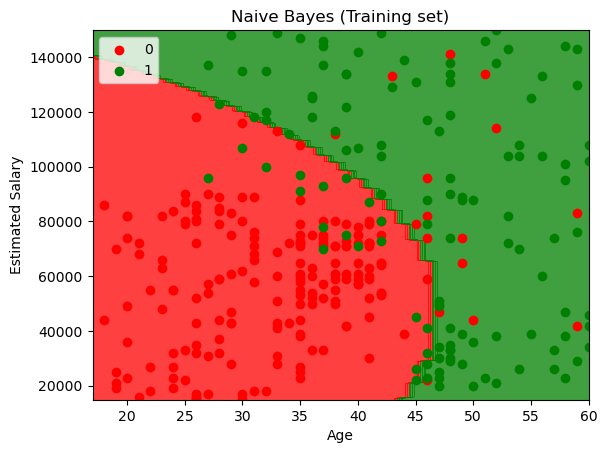

In [21]:
from matplotlib.colors import ListedColormap

# Inverse scaling to plot in original scale
X_set, y_set = sc.inverse_transform(X_train), y_train

# Choose a reasonable step size
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=1.0),
    np.arange(start=X_set[:, 1].min() - 100, stop=X_set[:, 1].max() + 100, step=500.0)
)

# Predict the classifier's output for every point on the grid
grid_points = np.array([X1.ravel(), X2.ravel()]).T
grid_scaled = sc.transform(grid_points)
Z = classifier.predict(grid_scaled).reshape(X1.shape)

# Plotting decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting training points
colors = ['red', 'green']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=colors[i], label=j)

plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the test set 

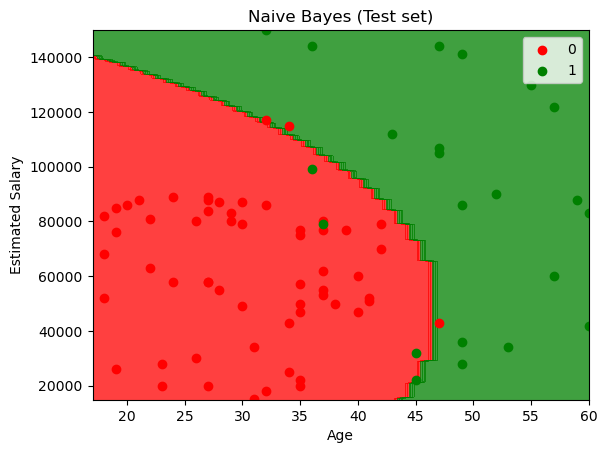

In [23]:
# Inverse transform the test features
X_set, y_set = sc.inverse_transform(X_test), y_test

# Choose optimized step sizes
step_x1 = 1.0
step_x2 = 500.0

# Create a grid over the feature space
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=step_x1),
    np.arange(start=X_set[:, 1].min() - 100, stop=X_set[:, 1].max() + 100, step=step_x2)
)

# Predict over the grid and reshape
grid_points = np.array([X1.ravel(), X2.ravel()]).T
Z = classifier.predict(sc.transform(grid_points)).reshape(X1.shape)

# Plot decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot for actual test data
colors = ['red', 'green']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=colors[i], label=j)

# Labels and legend
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()